# Working with GDP data

### Introduction
This notebook aims to analyze the velocity data from drifters within the tropical Atlantic Ocean. 
The current variables are represented here by $ve$, $vn$, and we have added the $sst$.

### Data Sources
- Drifter Data:
  - Source: NOAA
  - Collection Frequency: Every 6 hours
  - Total Number of Drifters: 230
  - link : https://erddap.aoml.noaa.gov/gdp/erddap/tabledap/drifter_6hour_qc.html
  - period : 01-01-2022 to 01-01-2023

## Import library

In [13]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.interpolate import griddata


import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
import cartopy.feature as cfeature
from cartopy import config
import matplotlib.animation


import numpy as np
import xarray as xr
import pandas as pd
import netCDF4 as nc

## File location and name               

In [14]:
fn='./drifter_6hour_qc_a65f_894f_fcdf_U1719475759871.nc';
ds=xr.open_dataset(fn);

C:\ProgramData\anaconda3\Lib\site-packages\xarray\coding\times.py:254: RuntimeWarning: invalid value encountered in cast
  flat_num_dates_ns_int = (flat_num_dates * _NS_PER_TIME_DELTA[delta]).astype(
C:\ProgramData\anaconda3\Lib\site-packages\xarray\coding\times.py:254: RuntimeWarning: invalid value encountered in cast
  flat_num_dates_ns_int = (flat_num_dates * _NS_PER_TIME_DELTA[delta]).astype(


## Read Drifter Data

In [15]:
ds

<xarray.Dataset>
Dimensions:               (row: 107572)
Dimensions without coordinates: row
Data variables: (12/46)
    ID                    (row) object ...
    WMO                   (row) float64 ...
    expno                 (row) float64 ...
    time                  (row) datetime64[ns] ...
    latitude              (row) float64 ...
    longitude             (row) float64 ...
    ...                    ...
    DrogueBallast         (row) object ...
    DragAreaAboveDrogue   (row) object ...
    DragAreaOfDrogue      (row) object ...
    DragAreaRatio         (row) object ...
    DrogueCenterDepth     (row) object ...
    DrogueDetectSensor    (row) object ...
Attributes: (12/54)
    acknowledgement:            Lumpkin, Rick; Centurioni, Luca (2019). Globa...
    cdm_data_type:              Trajectory
    cdm_trajectory_variables:   ID
    comment:                    Global Drifter Program 6h data
    contributor_name:           NOAA Global Drifter Program
    contributor_role:           Data Acquisition Center
    ...                         ...
    summary:                    Global Drifter Program 6-hourly drifting buoy...
    time_coverage_end:          2023-01-01T00:00:00Z
    time_coverage_start:        2022-01-01T00:00:00Z
    title:                      Global Drifter Program - 6 Hour Interpolated ...
    Westernmost_Easting:        -69.989
    wmo_platform_code:          3300654

## Extract coordinates and variables

In [16]:
print(ds)
ve_curr = ds.ve.values
vn_curr = ds.vn.values
sst = ds.sst.values
lon = ds.longitude.values
lat = ds.latitude.values
time = ds.time.values 

<xarray.Dataset>
Dimensions:               (row: 107572)
Dimensions without coordinates: row
Data variables: (12/46)
    ID                    (row) object ...
    WMO                   (row) float64 ...
    expno                 (row) float64 ...
    time                  (row) datetime64[ns] ...
    latitude              (row) float64 ...
    longitude             (row) float64 ...
    ...                    ...
    DrogueBallast         (row) object ...
    DragAreaAboveDrogue   (row) object ...
    DragAreaOfDrogue      (row) object ...
    DragAreaRatio         (row) object ...
    DrogueCenterDepth     (row) object ...
    DrogueDetectSensor    (row) object ...
Attributes: (12/54)
    acknowledgement:            Lumpkin, Rick; Centurioni, Luca (2019). Globa...
    cdm_data_type:              Trajectory
    cdm_trajectory_variables:   ID
    comment:                    Global Drifter Program 6h data
    contributor_name:           NOAA Global Drifter Program
    contributor_role: 

## Determining Minimum and Maximum Latitude, Longitude, Time, ve, vn, and sst 
# for Mapping

In [17]:
print("min_lat = ", min(ds.latitude.values))
print("max_lat = ", max(ds.latitude.values))
print("min_lon = ", min(ds.longitude.values))
print("max_lon = ", max(ds.longitude.values))
print("min_time = ", min(ds.time.values))
print("max_time = ", max(ds.time.values))
print("min_ve = ", min(ds.ve.values))
print("max_ve = ", max(ds.ve.values))
print("min_vn = ", min(ds.vn.values))
print("max_vn = ", max(ds.vn.values))
print("min_sst = ", min(ds.sst.values))
print("max_sst = ", max(ds.sst.values))

min_lat =  -20.0
max_lat =  20.0
min_lon =  -69.989
max_lon =  11.076
min_time =  2022-01-01T00:00:00.000000000
max_time =  2023-01-01T00:00:00.000000000
min_ve =  -999999.0
max_ve =  2.42826
min_vn =  -999999.0
max_vn =  2.72021
min_sst =  17.52
max_sst =  31.248


## let's plot the ve, vn and sst

## At the stat of their deploymennt : note that we have approximatively 230 Drifters in our study zone

## Drifters trajectories On all the period

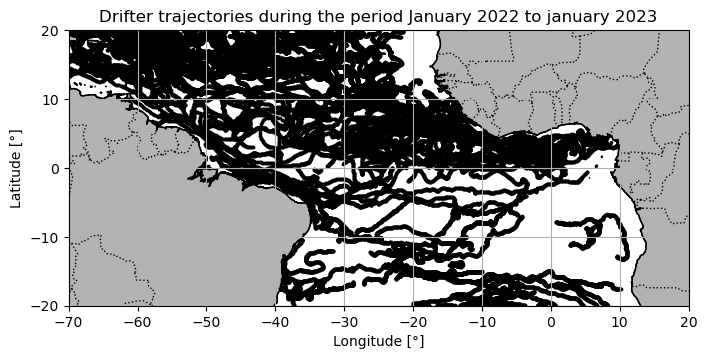

In [18]:
plt.figure(figsize=(8, 4))
ax = plt.axes(projection=ccrs.PlateCarree())
sc = ax.scatter(
    ds.longitude.values,
    ds.latitude.values,
    color='k',
    s=3,
    transform=ccrs.PlateCarree())

ax.coastlines(resolution='10m', color='black')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='0.7', edgecolor='k')

# Specify axes limits and ticks
plt.xlim(-70, 20)  # Longitude axis from 70W to 20E
plt.ylim(-20, 20)  # Latitude axis from 20S to 20N
plt.xticks(np.arange(-70, 30, 10))  # Longitude ticks every 10 degrees
plt.yticks(np.arange(-20, 30, 10))  # Latitude ticks every 10 degrees

# Add grid
plt.grid(True)

# Title and axes labels
ax.set_title('Drifter trajectories during the period January 2022 to january 2023')
plt.xlabel('Longitude [°]')
plt.ylabel('Latitude [°]')

plt.savefig("fig1 mode.png")

# Show the plot
plt.show()

## case of ve

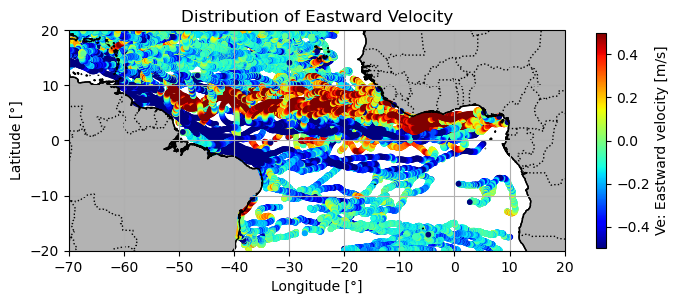

In [19]:
plt.figure(figsize=(8, 4))
ax = plt.axes(projection=ccrs.PlateCarree())
sc = ax.scatter(
    ds.longitude.values,
    ds.latitude.values,
    10,
    c=ds.ve.values,
    vmin=-0.5,
    vmax= 0.5,
    transform=ccrs.PlateCarree(),
    cmap='jet')

ax.coastlines(resolution='10m', color='black')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='0.7', edgecolor='k')

# Specify axes limits and ticks
plt.xlim(-70, 20)  # Longitude axis from 70W to 20E
plt.ylim(-20, 20)  # Latitude axis from 20S to 20N
plt.xticks(np.arange(-70, 30, 10))  # Longitude ticks every 10 degrees
plt.yticks(np.arange(-20, 30, 10))  # Latitude ticks every 10 degrees

# Specify colorbar limits based on actual Eastward velocity values
plt.colorbar(sc, orientation='vertical', shrink=0.7,label='Ve: Eastward velocity [m/s]')

# Add grid
plt.grid(True)

# Title and axes labels
ax.set_title('Distribution of Eastward Velocity')
plt.xlabel('Longitude [°]')
plt.ylabel('Latitude [°]')

plt.savefig("fig2 mode.png")

# Show the plot
plt.show()

## case of vn

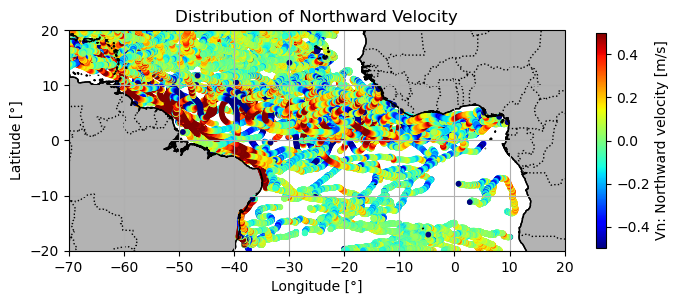

In [20]:
plt.figure(figsize=(8, 4))
ax = plt.axes(projection=ccrs.PlateCarree())
sc = ax.scatter(
    ds.longitude.values,
    ds.latitude.values,
    10,
    c=ds.vn.values,
    vmin=-0.5,
    vmax=0.5,
    transform=ccrs.PlateCarree(),
    cmap='jet')

ax.coastlines(resolution='10m', color='black')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='0.7', edgecolor='k')

# Specify axes limits and ticks
plt.xlim(-70, 20)  # Longitude axis from 70W to 20E
plt.ylim(-20, 20)  # Latitude axis from 20S to 20N
plt.xticks(np.arange(-70, 30, 10))  # Longitude ticks every 10 degrees
plt.yticks(np.arange(-20, 30, 10))  # Latitude ticks every 10 degrees

# Specify colorbar limits based on actual Northward velocity values
plt.colorbar(sc, orientation='vertical', shrink=0.7,label='Vn: Northward velocity [m/s]')

# Add grid
plt.grid(True)

# Title and axes labels
ax.set_title('Distribution of Northward Velocity')
plt.xlabel('Longitude [°]')
plt.ylabel('Latitude [°]')

plt.savefig("fig3 mode.png")

# Show the plot
plt.show()

## case of sst

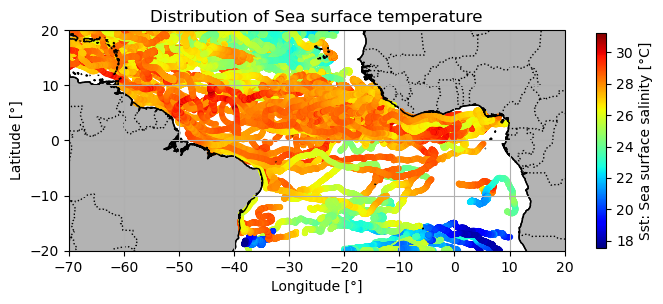

In [21]:
plt.figure(figsize=(8, 4))
ax = plt.axes(projection=ccrs.PlateCarree())
sc = ax.scatter(
    ds.longitude.values,
    ds.latitude.values,
    10,
    c=ds.sst.values,
    vmin=17.52,
    vmax=31.248,
    transform=ccrs.PlateCarree(),
    cmap='jet')

ax.coastlines(resolution='10m', color='black')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='0.7', edgecolor='k')

# Specify axes limits and ticks
plt.xlim(-70, 20)  # Longitude axis from 70W to 20E
plt.ylim(-20, 20)  # Latitude axis from 20S to 20N
plt.xticks(np.arange(-70, 30, 10))  # Longitude ticks every 10 degrees
plt.yticks(np.arange(-20, 30, 10))  # Latitude ticks every 10 degrees

# Specify colorbar limits based on actual SST values
plt.colorbar(sc, orientation='vertical', shrink=0.7,label='Sst: Sea surface salinity [°C]')

# Add grid
plt.grid(True)

# Title and axes labels
ax.set_title('Distribution of Sea surface temperature')
plt.xlabel('Longitude [°]')
plt.ylabel('Latitude [°]')

plt.savefig("fig4 mode.png")

# Show the plot
plt.show()